# IVP EXP 3 - IMAGE COMPRESSION

## 1. User Input

In [11]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2

In [12]:
def get_image_from_user():
    while True:
        try:
            print("Choose the type of input:")
            print("1 --> Binary matrix")
            print("2 --> Colour image")
            user_input = int(input("Your choice --> "))
            if user_input == 1:
                order = int(input("Enter the order of the matrix (e.g., 3 for a 3x3 matrix): "))
                binary_matrix = matrix_input(order)
                binary_image = Image.fromarray(np.uint8(binary_matrix))
                
                input_folder = "C:\\Users\\Flavia Saldanha\\Desktop\\IVP Lab\\original"
                input_image_name = input("Enter the name for this image (with extension): ")
                input_image_path = os.path.join(input_folder, input_image_name)
                binary_image.save(input_image_path)
                return order, input_image_path, binary_image
            
            elif user_input == 2:
                input_folder = "C:\\Users\\Flavia Saldanha\\Desktop\\IVP Lab\\original"
                input_image_name = input("Enter the name for the input image (with extension): ")
                input_image_path = os.path.join(input_folder, input_image_name)
                input_image = Image.open(input_image_path)
                return 0, input_image_path, input_image
            
        except Exception as e:
            print("Error:", e)
            
def matrix_input(order):
    rows = []
    for i in range(order):
        while True:
            try:
                row_input = input(f"Enter {order} elements for row {i+1}, separated by spaces: ")
                elements = row_input.split()
                row = [int(element) for element in elements]
                if len(row) < order:
                    # Pad zeros to match the specified order
                    row += [0] * (order - len(row))
                    print(f"Padding zeros to match the specified order. Adjusted row {i+1}.")
                elif len(row) > order:
                    # Remove extreme elements to match the specified order
                    row = row[:order]
                    print(f"Slicing to match the specified order. Adjusted row {i+1}.")
                rows.append(row)
                break
            except ValueError:
                print("Error: Please enter valid integers for the elements.")
    matrix = np.array(rows, dtype="object")
    return matrix

## 2. Compression by resizing the image

In [13]:
def resizing(order, input_image, input_image_path): 
    width, height = input_image.size
    new_size = (width // (order if order != 0 else 4), height // (order if order != 0 else 4))
    resized_image = input_image.resize(new_size)

    # Save the resized image
    output_image_name = input("Enter the name for the 1st compressed image (with extension): ")
    output_folder = "C:\\Users\\Flavia Saldanha\\Desktop\\IVP Lab\\compressed"
    output_image_path = os.path.join(output_folder, output_image_name)
    resized_image.save(output_image_path, optimize=True, quality=50)
    
    # Display the input image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(input_image, cmap='gray')
    plt.title('Input Image')
    plt.axis('off')
    
    # Display the output image
    plt.subplot(1, 2, 2)
    plt.imshow(resized_image, cmap='gray')
    plt.title('Compressed Image by resizing')
    plt.axis('off')

    # Show input and output images
    plt.show()
    
    # Get file sizes
    original_size = os.path.getsize(input_image_path)
    compressed_size = os.path.getsize(output_image_path)
    print("Original Size: ", original_size)
    print("Compressed Size: ", compressed_size)

Choose the type of input:
1 --> Binary matrix
2 --> Colour image
Your choice --> 1
Enter the order of the matrix (e.g., 3 for a 3x3 matrix): 8
Enter 8 elements for row 1, separated by spaces: 0 1 1 0 0 0 1 0
Enter 8 elements for row 2, separated by spaces: 0 0 0 1 1 1 1 1
Enter 8 elements for row 3, separated by spaces: 0 1 1 1 0 0 0 0
Enter 8 elements for row 4, separated by spaces: 1 1 0 0 1 1 1 1
Enter 8 elements for row 5, separated by spaces: 0 0 0 0 0 0 0 1
Enter 8 elements for row 6, separated by spaces: 0 0 1 1 1 1 1 1
Enter 8 elements for row 7, separated by spaces: 0 1 1 0 0 0 0 1
Enter 8 elements for row 8, separated by spaces: 0 0 0 0 0 0 0 0
Enter the name for this image (with extension): matrix.jpg
Enter the name for the 1st compressed image (with extension): matrix1.jpg


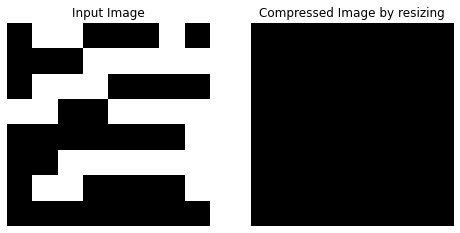

Original Size:  333
Compressed Size:  160


In [96]:
def main():
    # Get input from user
    order, input_image_path, input_image = get_image_from_user()
    
    # Method 1 - Resize the image
    resizing(order, input_image, input_image_path)
    
if __name__ == "__main__":
    main()

## 3. Compression by saving the image in a lossless format (PNG)

In [22]:
def save_as_png(input_image, input_image_path): 
    output_image_name = input("Enter the name for the 2nd compressed image (with png extension): ")
    output_folder = "C:\\Users\\Flavia Saldanha\\Desktop\\IVP Lab\\compressed"
    output_image_path = os.path.join(output_folder, output_image_name)
    input_image.save(output_image_path, format='PNG')
    
    # Display the input image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(input_image, cmap='gray')
    plt.title('Input Image')
    plt.axis('off')
    resized_image = Image.open(output_image_path)
    # Display the output image
    plt.subplot(1, 2, 2)
    plt.imshow(resized_image, cmap='gray')
    plt.title('Compressed Image by saving as PNG')
    plt.axis('off')

    # Show input and output images
    plt.show()

    # Get file sizes
    original_size = os.path.getsize(input_image_path)
    compressed_size = os.path.getsize(output_image_path)
    print("Original Size: ", original_size)
    print("Compressed Size: ", compressed_size)

Choose the type of input:
1 --> Binary matrix
2 --> Colour image
Your choice --> 2
Enter the name for the input image (with extension): ball.png
Enter the name for the 2nd compressed image (with png extension): ball.png


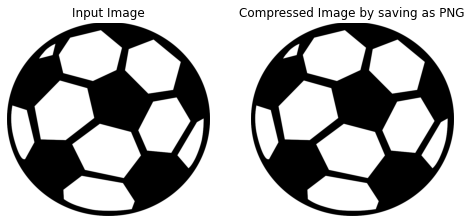

Original Size:  55180
Compressed Size:  54498


In [102]:
def main():
    # Get input from user
    order, input_image_path, input_image = get_image_from_user()
  
    # Method 2 - Save the image in a lossless format (PNG)
    save_as_png(input_image, input_image_path)
    
if __name__ == "__main__":
    main()

## 4. Compression using SKLearn PCA Transform (p.s. not suitable for binary matrix)

In [103]:
def transform(input_image_path):
    output_image_name = input("Enter the name for the 3rd compressed image (with extension): ")
    output_folder = "C:\\Users\\Flavia Saldanha\\Desktop\\IVP Lab\\compressed"
    output_image_path = os.path.join(output_folder, output_image_name)
    
    img = imread(input_image_path)
    img = img.astype(np.uint8)
    img = img/255
    img = img.mean(axis=2)
    
    percentage = int(input("Enter percentage of variance (between 0 and 100): "))
    transform_pca = PCA(n_components=percentage).fit(img)
    transformed = transform_pca.transform(img)
    projected = transform_pca.inverse_transform(transformed)
    resized_image = Image.fromarray((projected * 255).astype(np.uint8))
    resized_image.save(output_image_path, optimize=True, quality=50)

    # Display the input image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Input Image')
    plt.axis('off')
    
    # Display the output image
    plt.subplot(1, 2, 2)
    plt.imshow(projected, cmap='gray')
    plt.title('Compressed Image using PCA')
    plt.axis('off')

    # Show input and output images
    plt.show()

    # Get file sizes
    original_size = os.path.getsize(input_image_path)
    compressed_size = os.path.getsize(output_image_path)
    print("Original Size: ", original_size)
    print("Compressed Size: ", compressed_size)

Choose the type of input:
1 --> Binary matrix
2 --> Colour image
Your choice --> 2
Enter the name for the input image (with extension): stare.jpg
Enter the name for the 3rd compressed image (with extension): stare1.jpg
Enter percentage of variance (between 0 and 100): 88


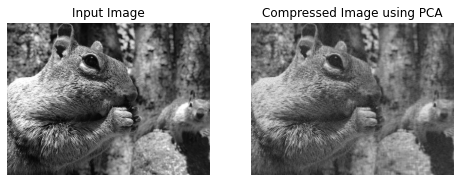

Original Size:  105449
Compressed Size:  67165


In [109]:
def main():
    # Get input from user
    order, input_image_path, input_image = get_image_from_user()

    # Method 3 - SKLearn PCA Transform 
    transform(input_image_path)
    
if __name__ == "__main__":
    main()

## 5. Compression using OpenCV 

In [106]:
def opencv_compression(input_image_path):
    output_image_name = input("Enter the name for the 3rd compressed image (with extension): ")
    output_folder = "C:\\Users\\Flavia Saldanha\\Desktop\\IVP Lab\\compressed"
    output_image_path = os.path.join(output_folder, output_image_name)
    quality = int(input("Enter the JPEG compression quality (0-100): "))
    # Read the input image
    img = cv2.imread(input_image_path)

    # Compress and save the image as JPEG
    cv2.imwrite(output_image_path, img, [int(cv2.IMWRITE_JPEG_QUALITY), quality])
 
    # Display the input image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Input Image')
    plt.axis('off')
    resized_image = Image.open(output_image_path)
    # Display the output image
    plt.subplot(1, 2, 2)
    plt.imshow(resized_image, cmap='gray')
    plt.title('Compressed Image using OpenCV')
    plt.axis('off')

    # Show input and output images
    plt.show()

    # Get file sizes
    original_size = os.path.getsize(input_image_path)
    compressed_size = os.path.getsize(output_image_path)
    print("Original Size: ", original_size)
    print("Compressed Size: ", compressed_size)

Choose the type of input:
1 --> Binary matrix
2 --> Colour image
Your choice --> 2
Enter the name for the input image (with extension): fruits.jpg
Enter the name for the 3rd compressed image (with extension): fruits1.jpg
Enter the JPEG compression quality (0-100): 65


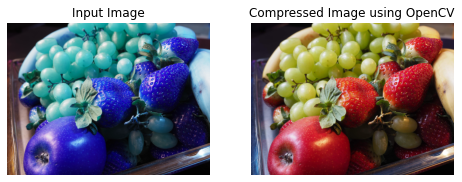

Original Size:  673230
Compressed Size:  295694


In [108]:
def main():
    # Get input from user
    order, input_image_path, input_image = get_image_from_user()

    # Method 4 - Using OpenCV
    opencv_compression(input_image_path)
    
if __name__ == "__main__":
    main()